<a href="https://colab.research.google.com/github/radhikabandi/ModelViewControllerTechBlog/blob/main/AML_Project_LearnerNotebook_LowCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [11]:
churn = pd.read_csv("/content/sample_data/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [12]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

In [13]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [14]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [15]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [16]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Checking for duplicate values

In [17]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [18]:
# let's check for missing values in the data

data.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


### Statistical summary of the dataset

In [19]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [20]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [21]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [22]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [23]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [24]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [26]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

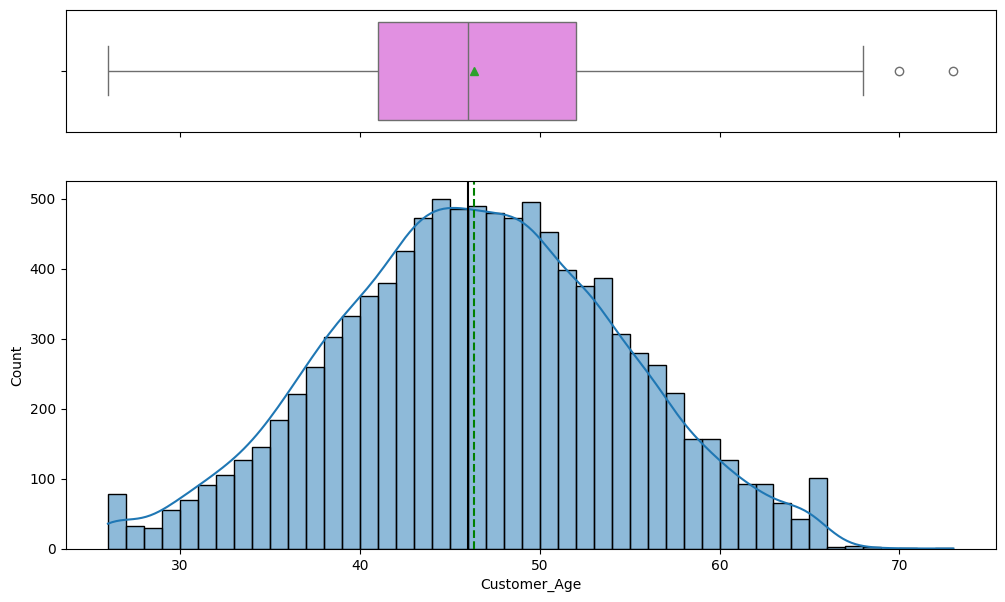

In [27]:
df1=pd.read_csv("/content/sample_data/BankChurners.csv")
histogram_boxplot(df1, "Customer_Age", kde=True)

`Months_on_book`

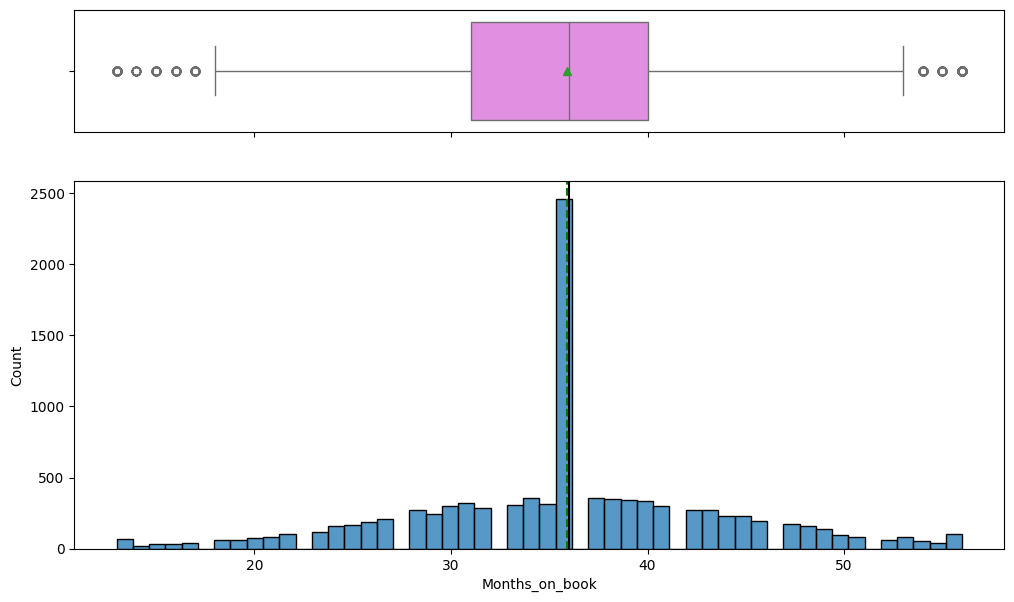

In [28]:
histogram_boxplot(df1, 'Months_on_book')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Credit_Limit`

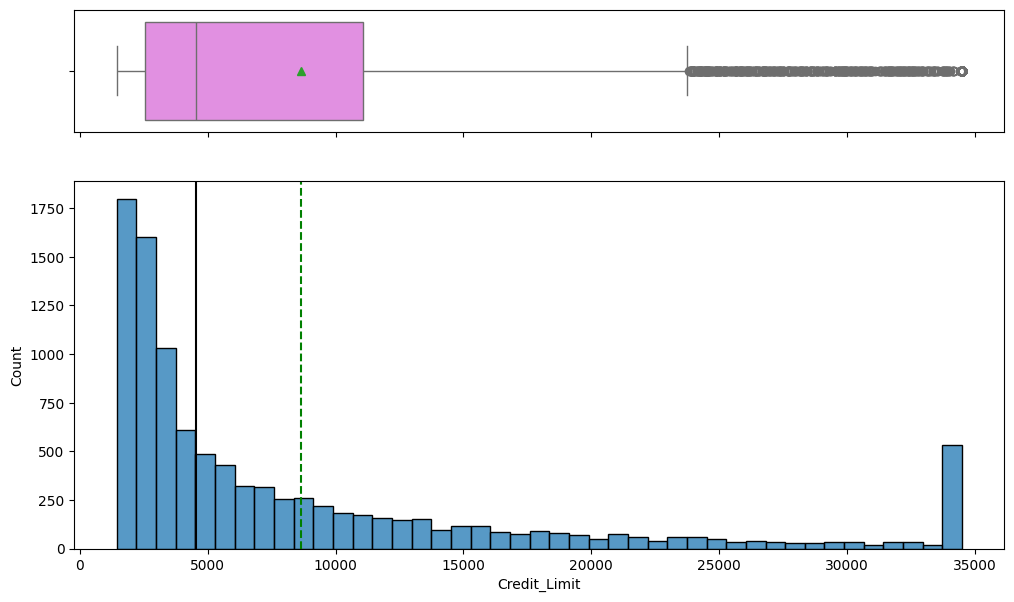

In [29]:
histogram_boxplot(df1, 'Credit_Limit')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Revolving_Bal`

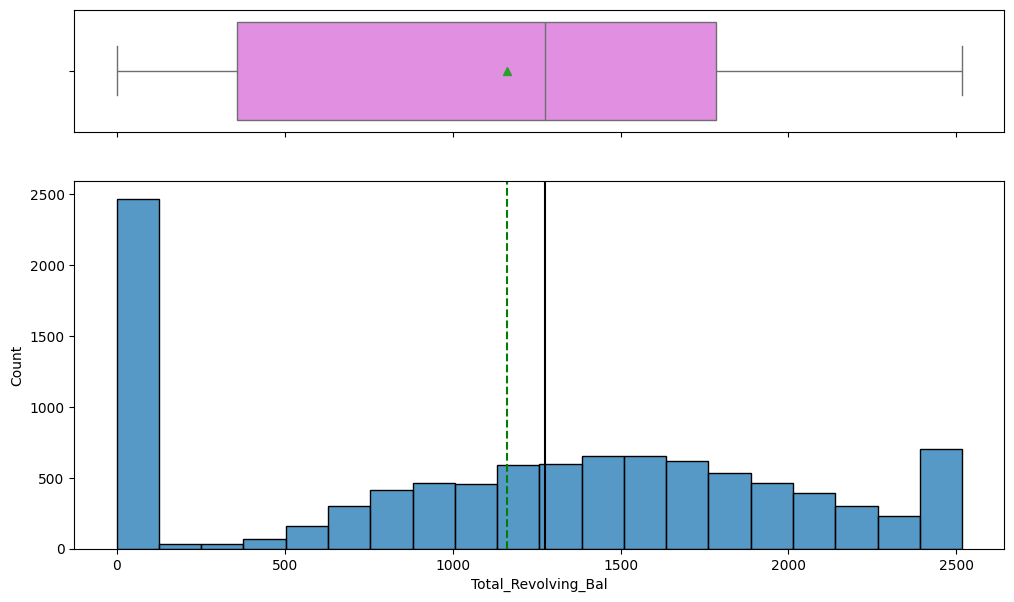

In [30]:
histogram_boxplot(df1, 'Total_Revolving_Bal')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Open_To_Buy`

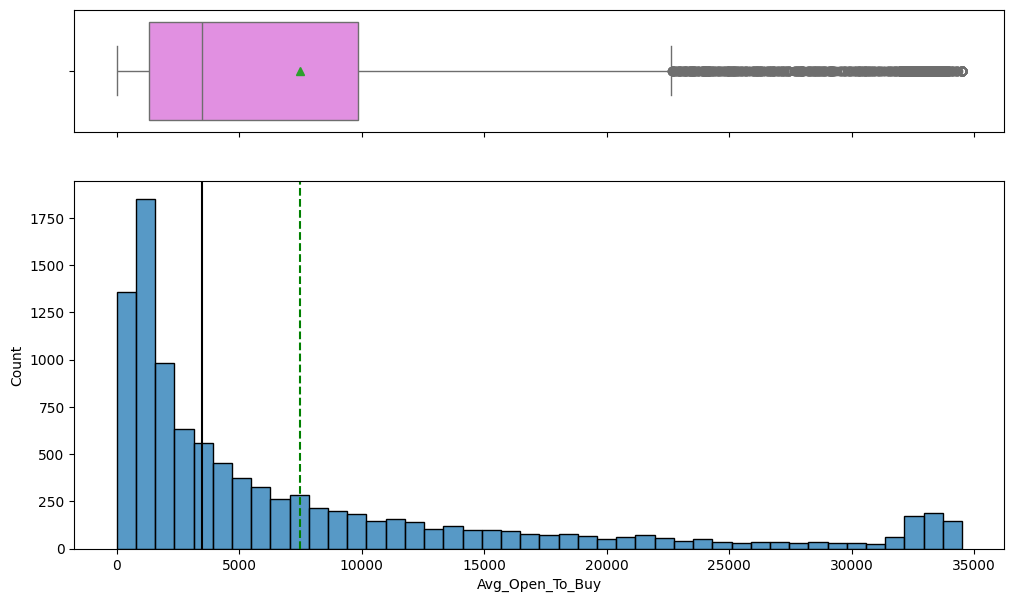

In [31]:
histogram_boxplot(df1, 'Avg_Open_To_Buy')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Trans_Ct`

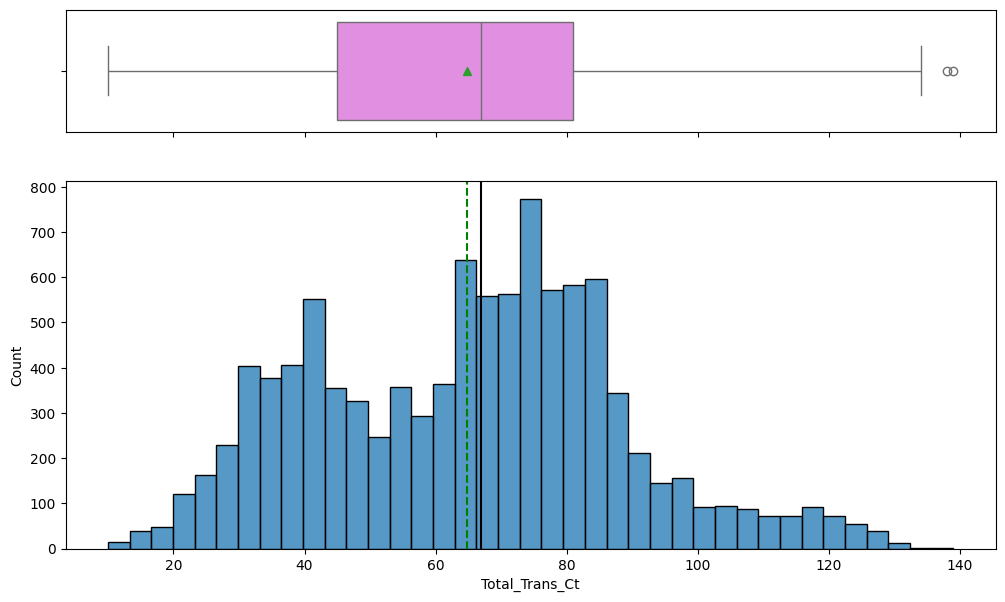

In [33]:
histogram_boxplot(df1, 'Total_Trans_Ct')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Amt_Chng_Q4_Q1`

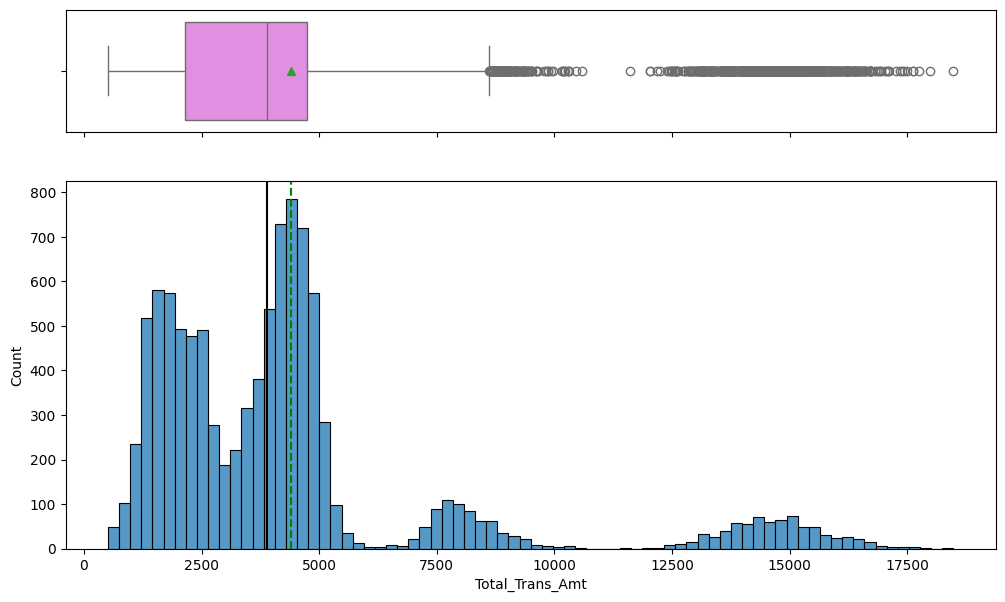

In [34]:
histogram_boxplot(df1, 'Total_Trans_Amt')  ## Complete the code to create histogram_boxplot for 'New_Price'

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

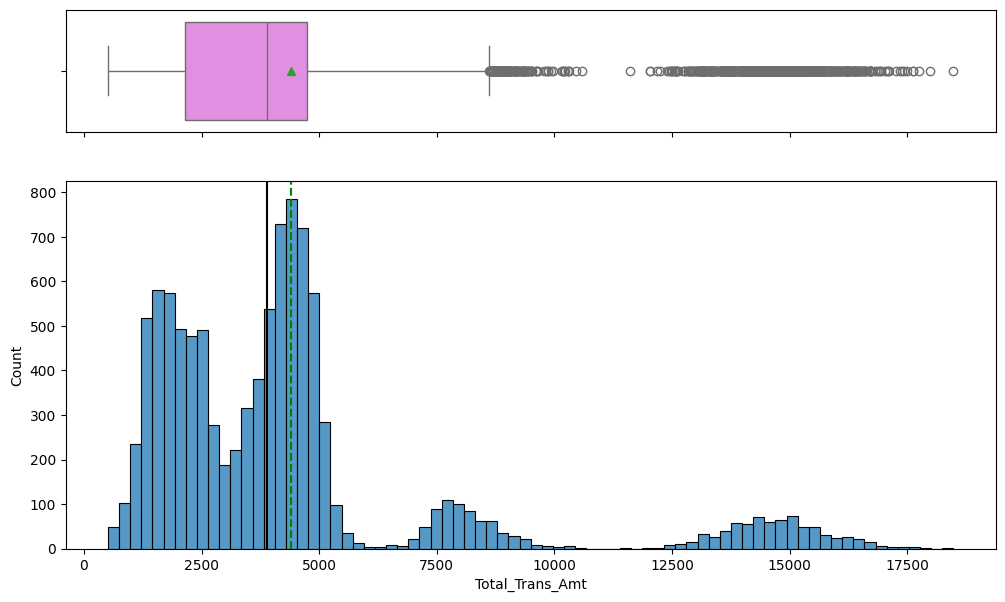

In [36]:
histogram_boxplot(df1, 'Total_Trans_Amt')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Ct_Chng_Q4_Q1`

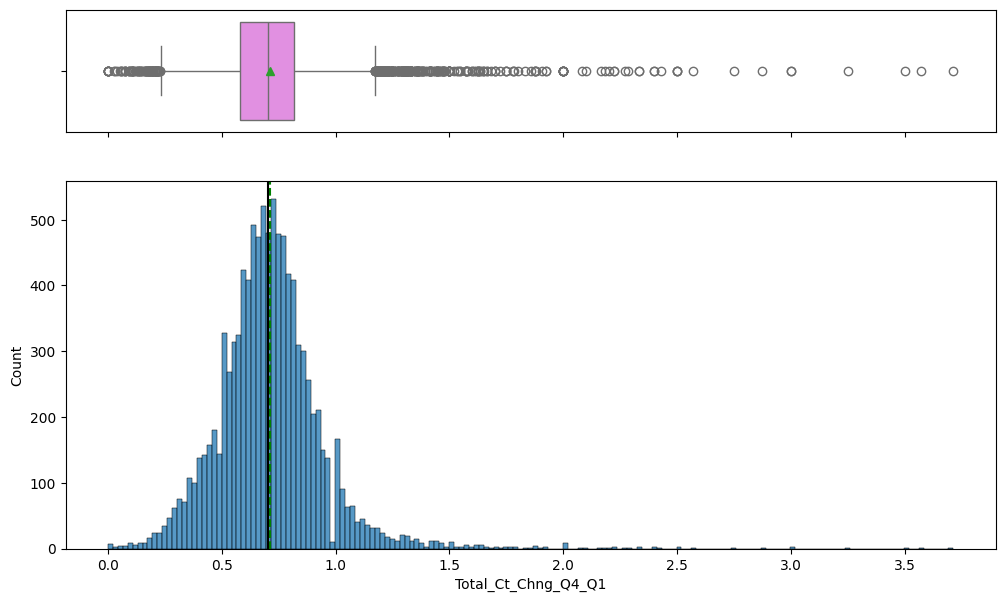

In [84]:
## Complete the code to create histogram_boxplot for 'New_Price'
histogram_boxplot(df1, 'Total_Ct_Chng_Q4_Q1')


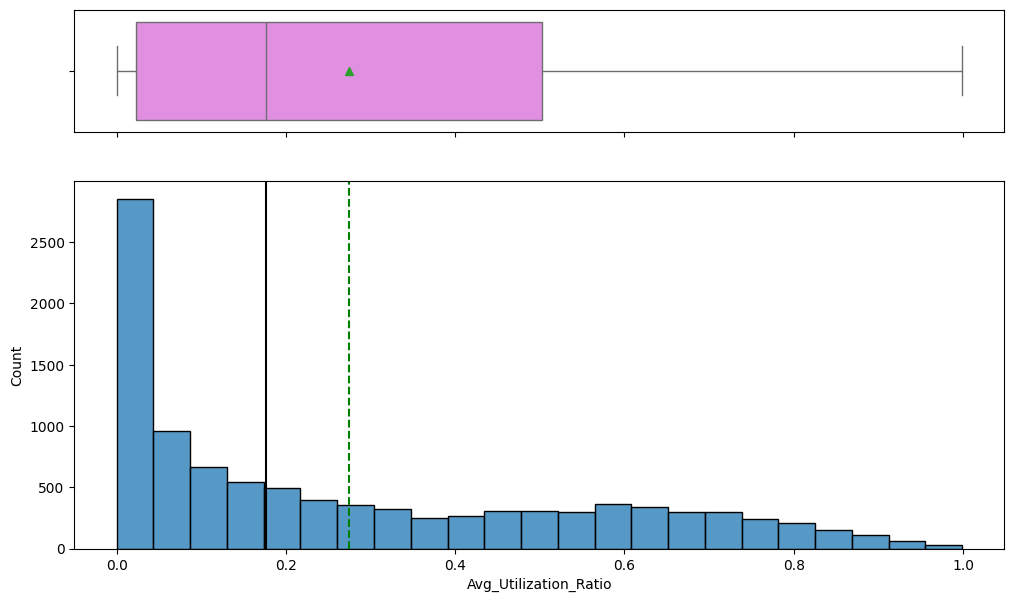

In [38]:
# prompt: histogram_boxplot('_______') ## Complete the code to create histogram_boxplot for 'New_Price'

histogram_boxplot(df1, 'Avg_Utilization_Ratio')


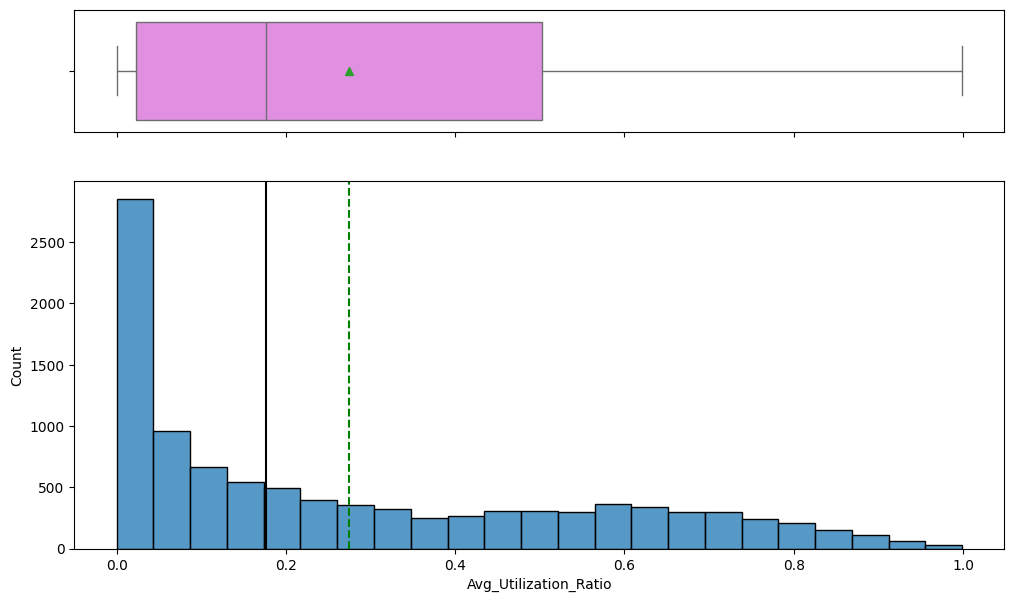

In [39]:
histogram_boxplot(df1, 'Avg_Utilization_Ratio')  ## Complete the code to create histogram_boxplot for 'New_Price'

In [ ]:
# prompt: histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'New_Price'

histogram_boxplot(df1, 'Avg_Utilization_Ratio')  ## Complete the code to create histogram_boxplot for 'New_Price'


`Avg_Utilization_Ratio`

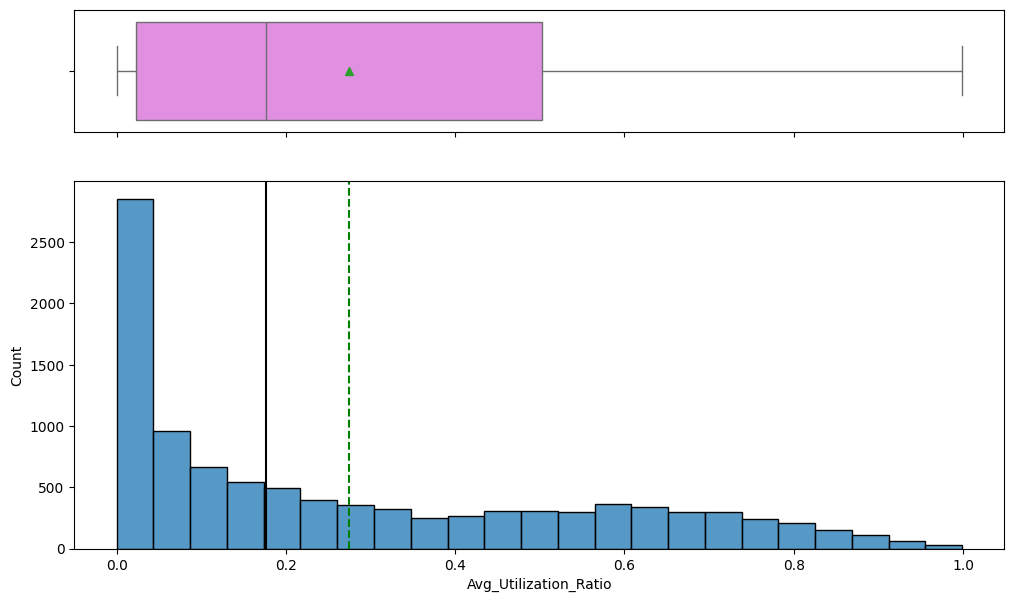

In [40]:
histogram_boxplot(df1, 'Avg_Utilization_Ratio')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Dependent_count`

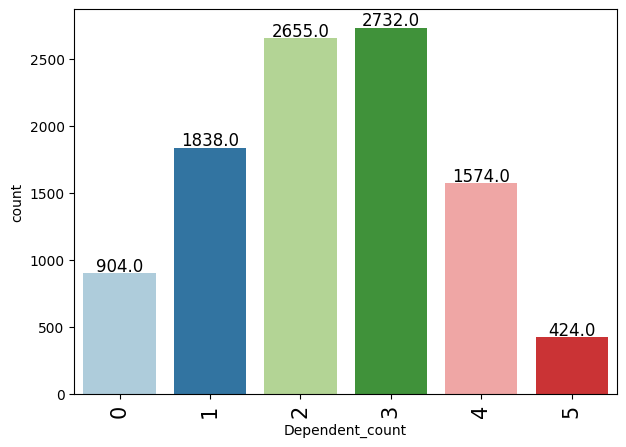

In [41]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

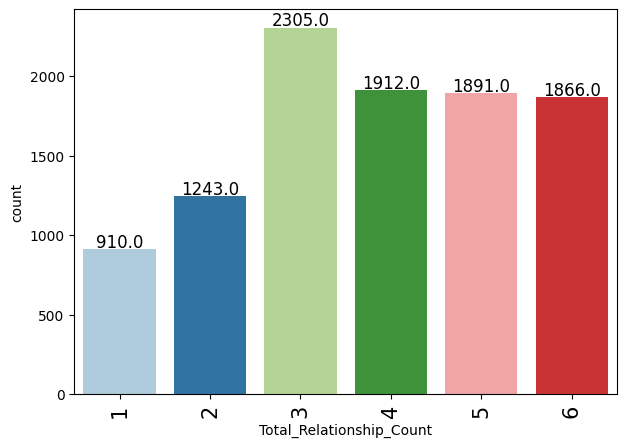

In [42]:
labeled_barplot(data, 'Total_Relationship_Count') ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

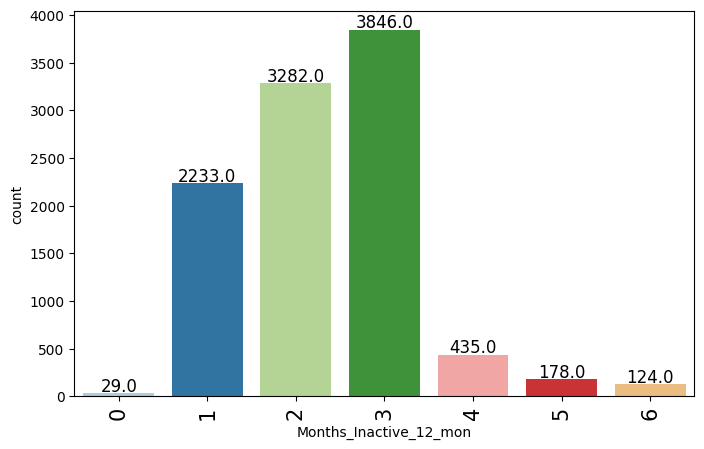

In [44]:
labeled_barplot(data, 'Months_Inactive_12_mon') ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

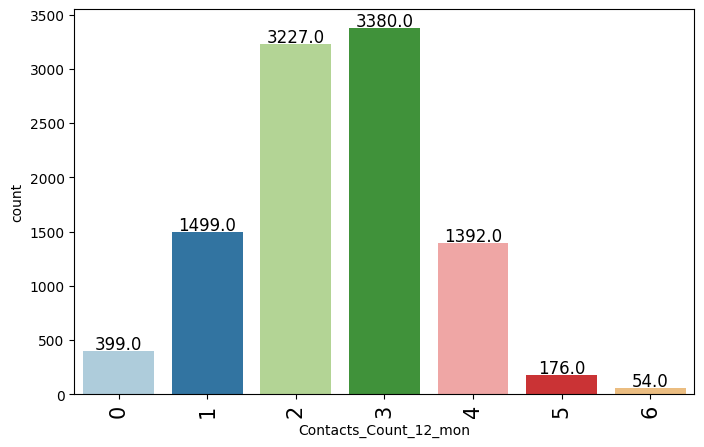

In [46]:
labeled_barplot(data, 'Contacts_Count_12_mon') ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

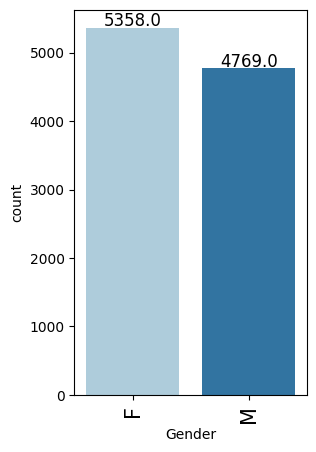

In [47]:
labeled_barplot(data, 'Gender') ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

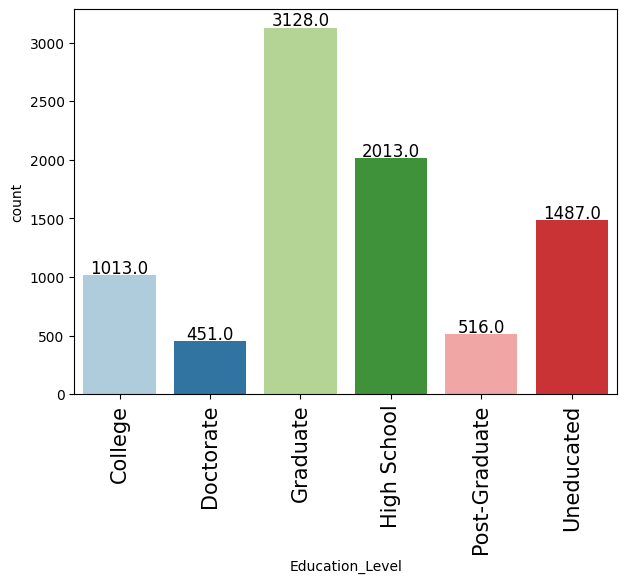

In [48]:
labeled_barplot(data, 'Education_Level') ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

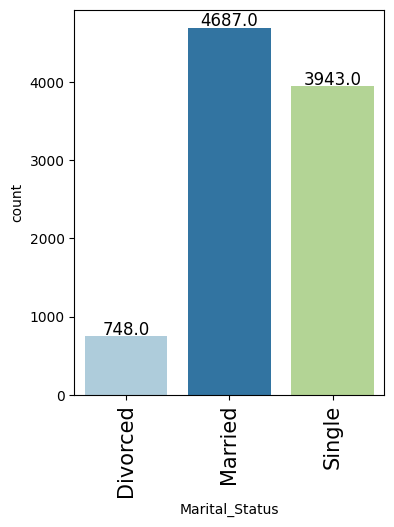

In [49]:
labeled_barplot(data, 'Marital_Status') ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

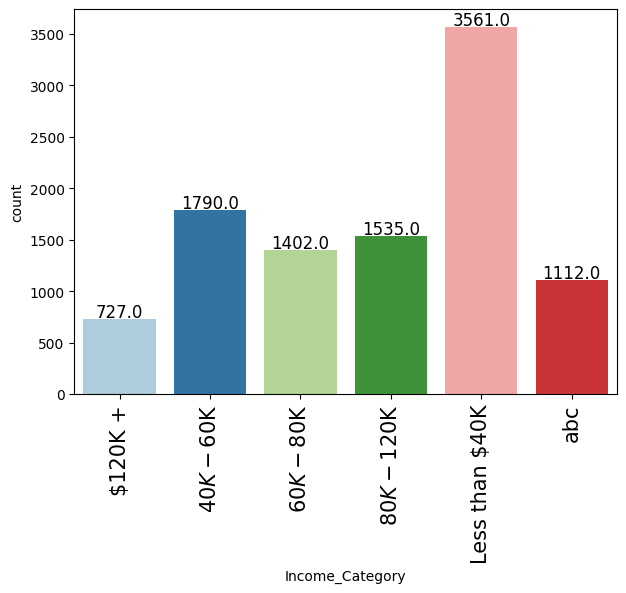

In [50]:
labeled_barplot(data, 'Income_Category') ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

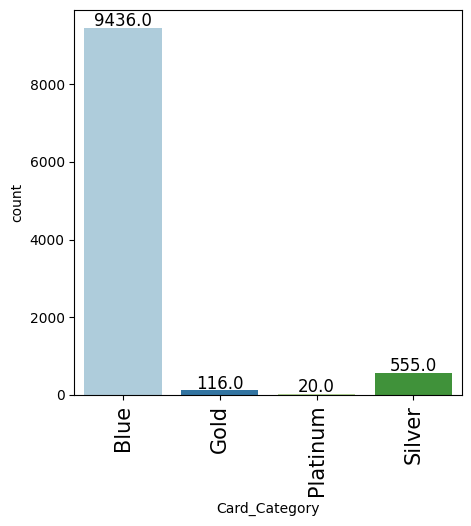

In [51]:
labeled_barplot(data, 'Card_Category') ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

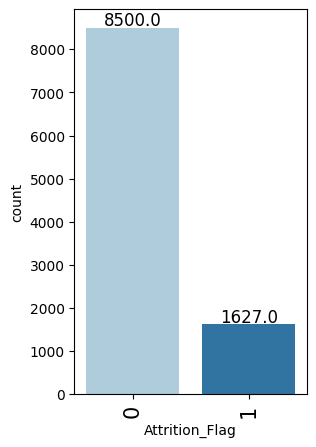

In [52]:
labeled_barplot(data, 'Attrition_Flag') ## Complete the code to create labeled_barplot for 'Attrition_Flag'

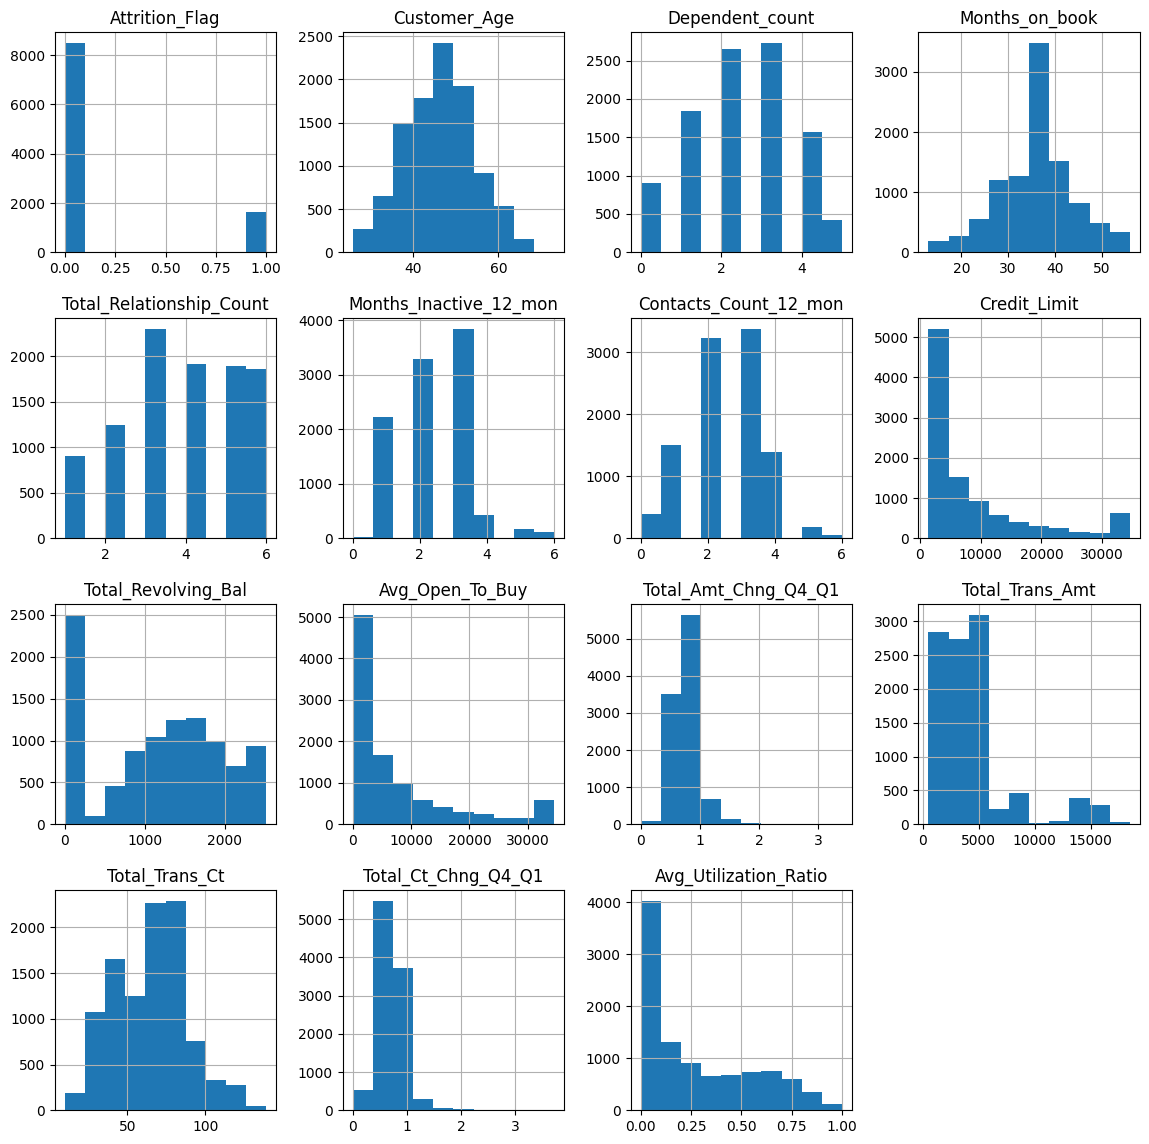

In [53]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

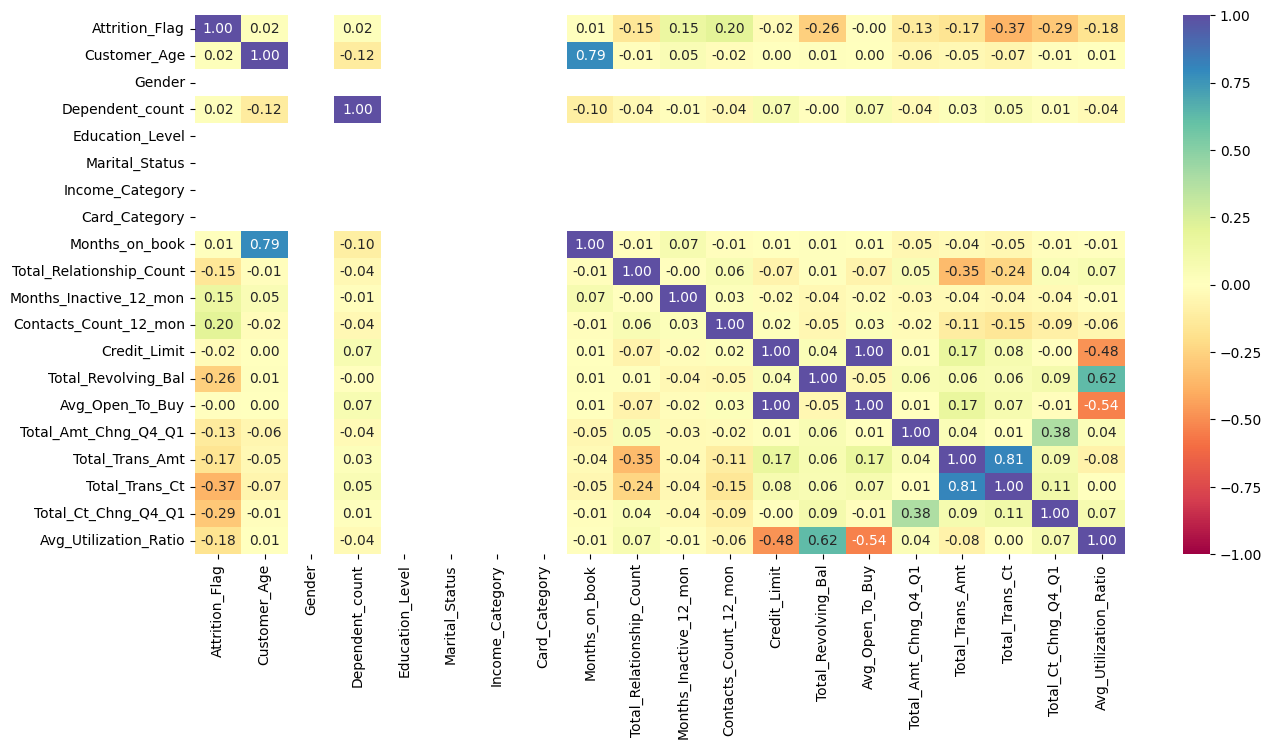

In [57]:
# Convert non-numerical columns to numerical if possible
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numbers, replace non-convertibles with NaN
        except:
            print(f"Could not convert column {col} to numeric")

# Calculate correlations on numerical columns only
plt.figure(figsize=(15, 7))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

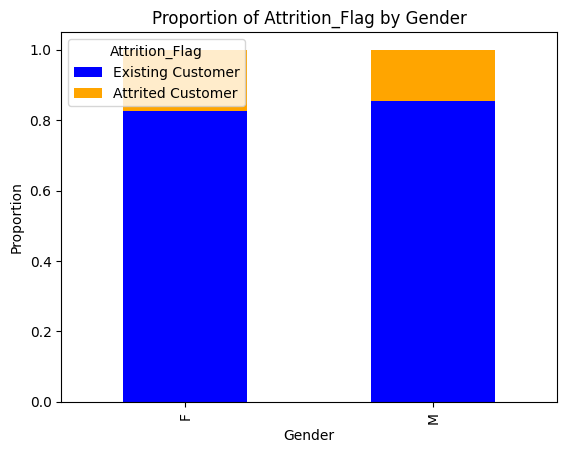

In [96]:
# Reloading the data

import pandas as pd
import matplotlib.pyplot as plt

def stacked_barplot(data, category_col, target_col):
    """
    Creates a stacked bar plot for the distribution of the target variable across categories.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    category_col (str): The name of the categorical column.
    target_col (str): The name of the target column.
    """
    # Create a cross-tabulation of the category and target columns
    cross_tab = pd.crosstab(data[category_col], data[target_col], normalize='index')

    # Plot the stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, color=['blue', 'orange'])
    plt.title(f'Proportion of {target_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Proportion')
    plt.legend(title=target_col, labels=['Existing Customer', 'Attrited Customer'])
    plt.show()


stacked_barplot(df, "Gender", "Attrition_Flag")



`Attrition_Flag vs Marital_Status`

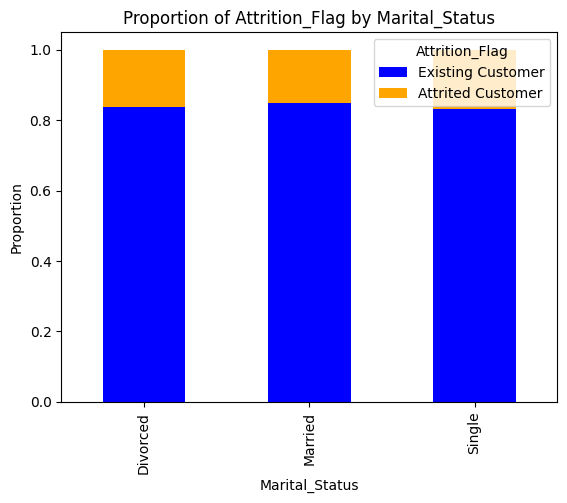

In [98]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

`Attrition_Flag vs Education_Level`

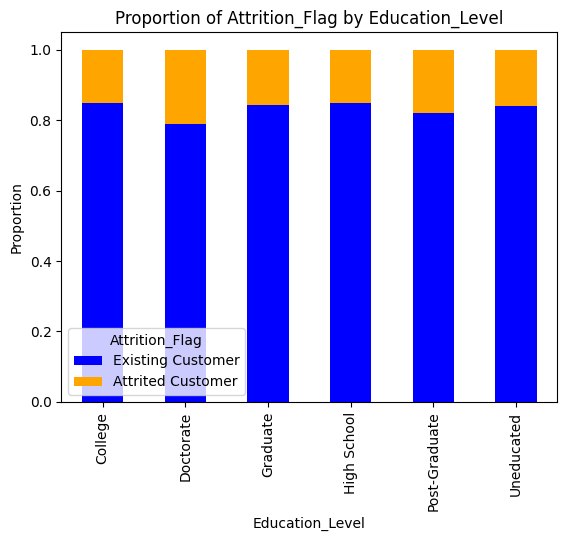

In [99]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

`Attrition_Flag vs Income_Category`

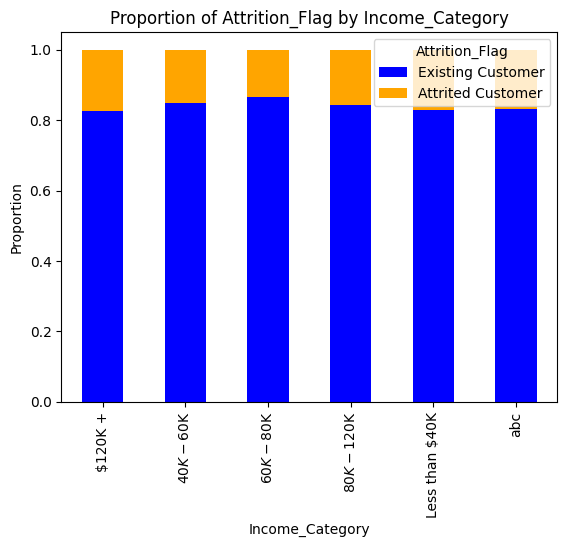

In [100]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")


`Attrition_Flag vs Contacts_Count_12_mon`

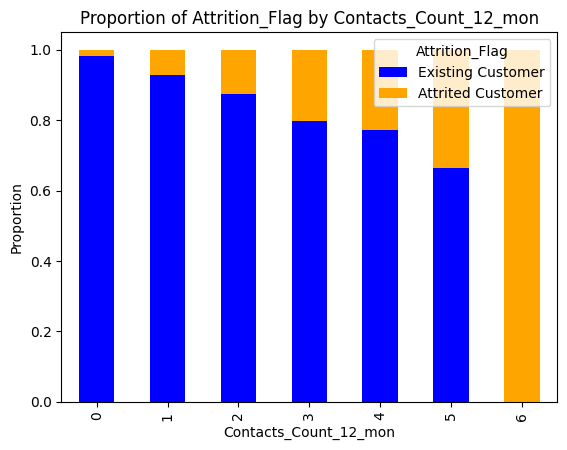

In [101]:
# Call the stacked_barplot function with the correct columns
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")
 ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

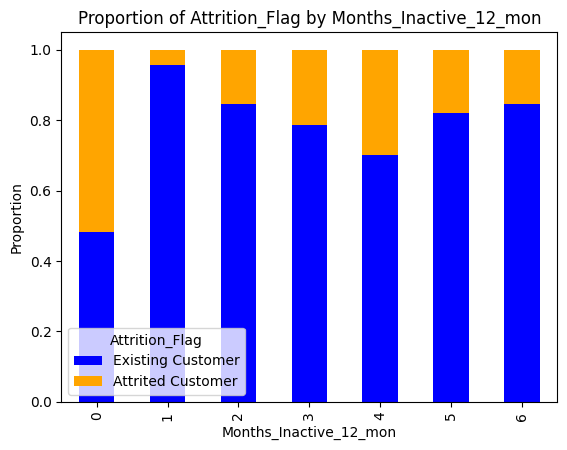

In [102]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon


`Attrition_Flag vs Total_Relationship_Count`

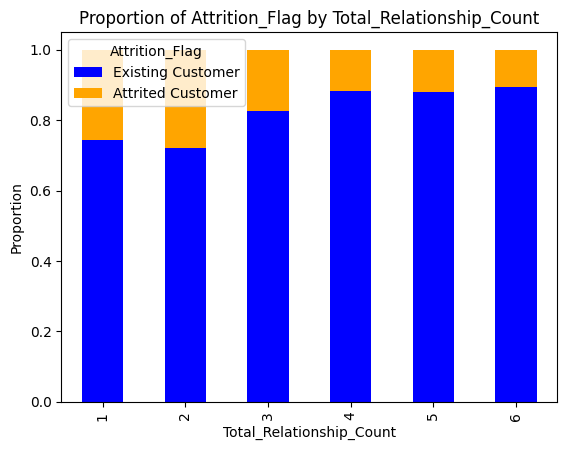

In [103]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count
 ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

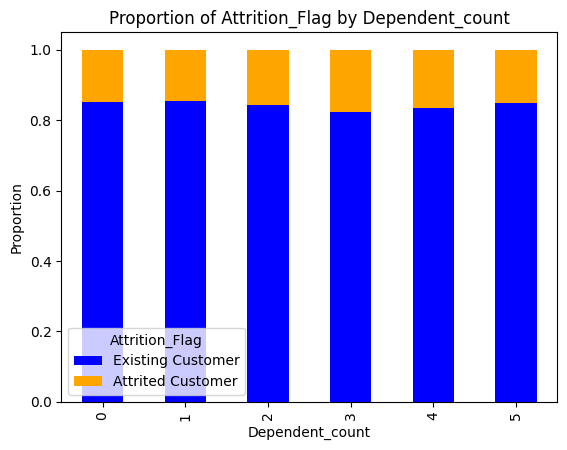

In [104]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

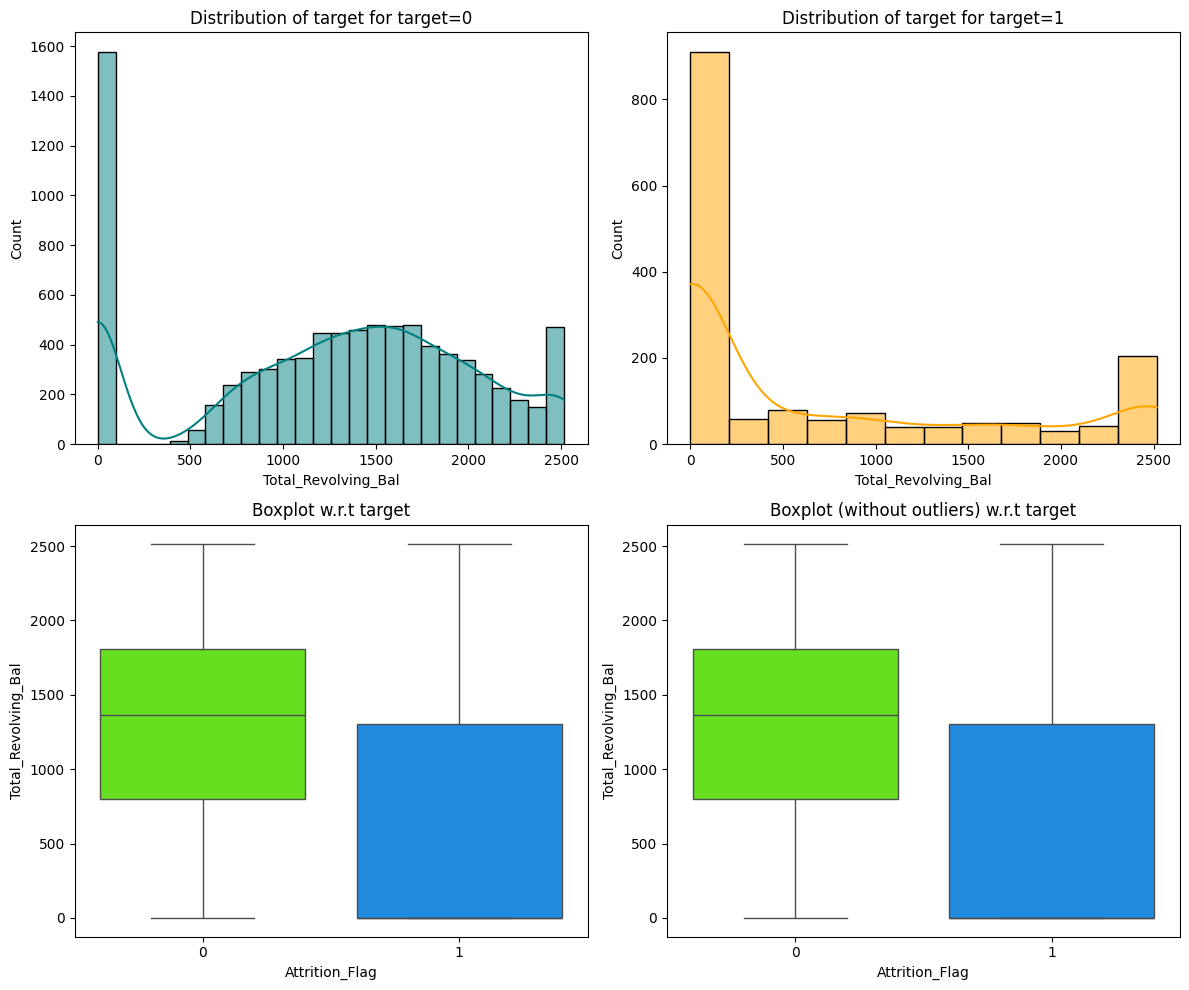

In [105]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

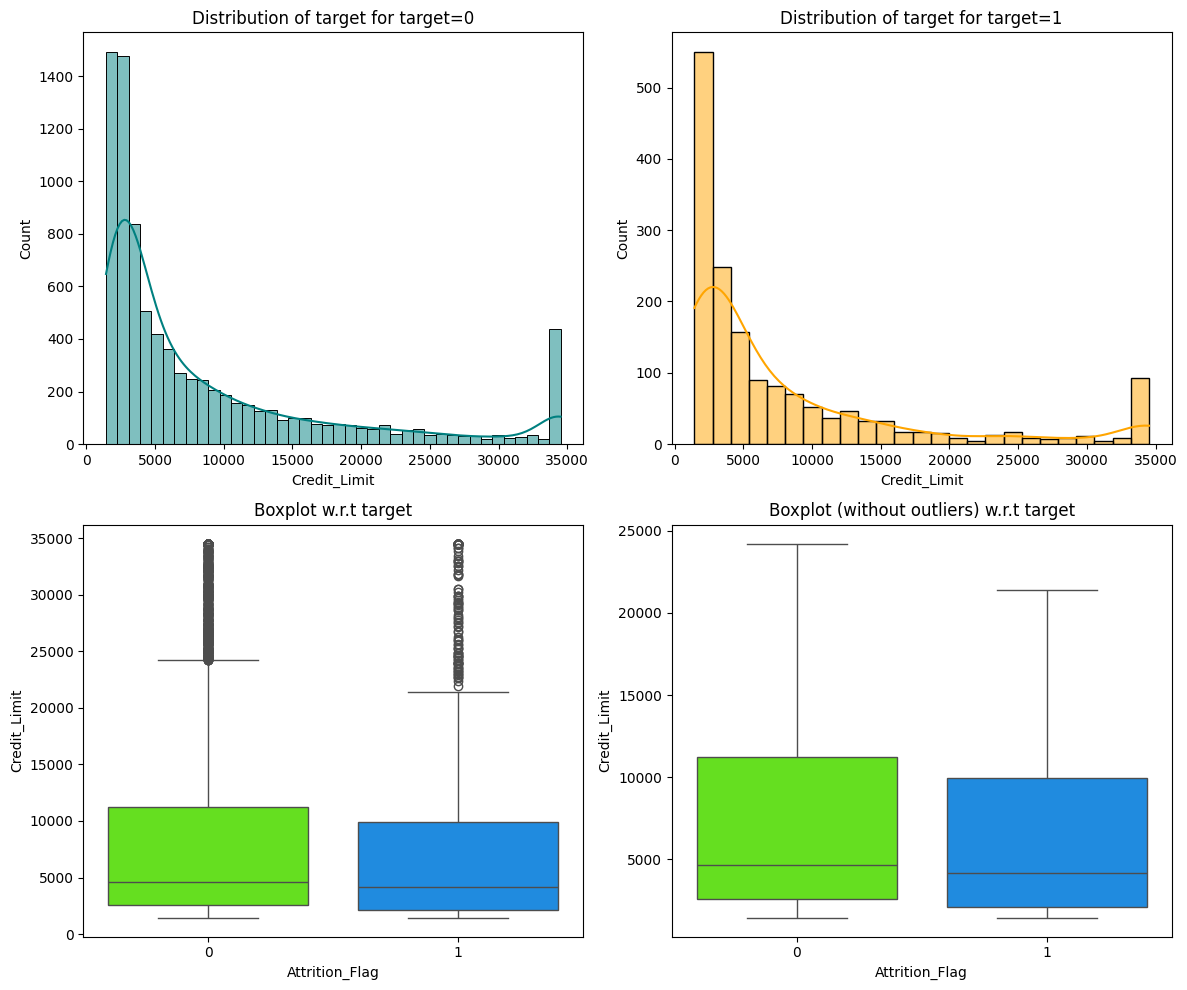

In [106]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

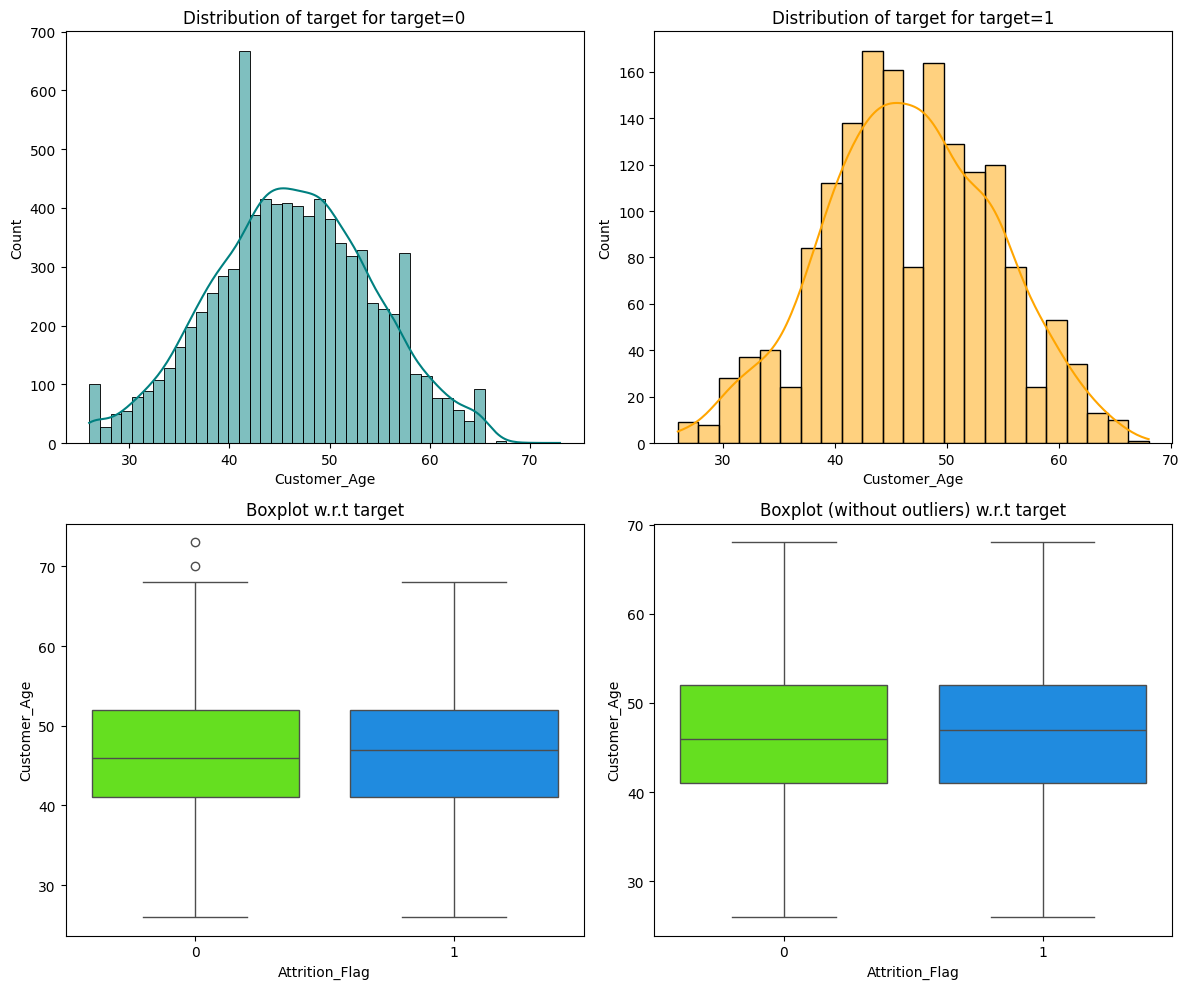

In [107]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

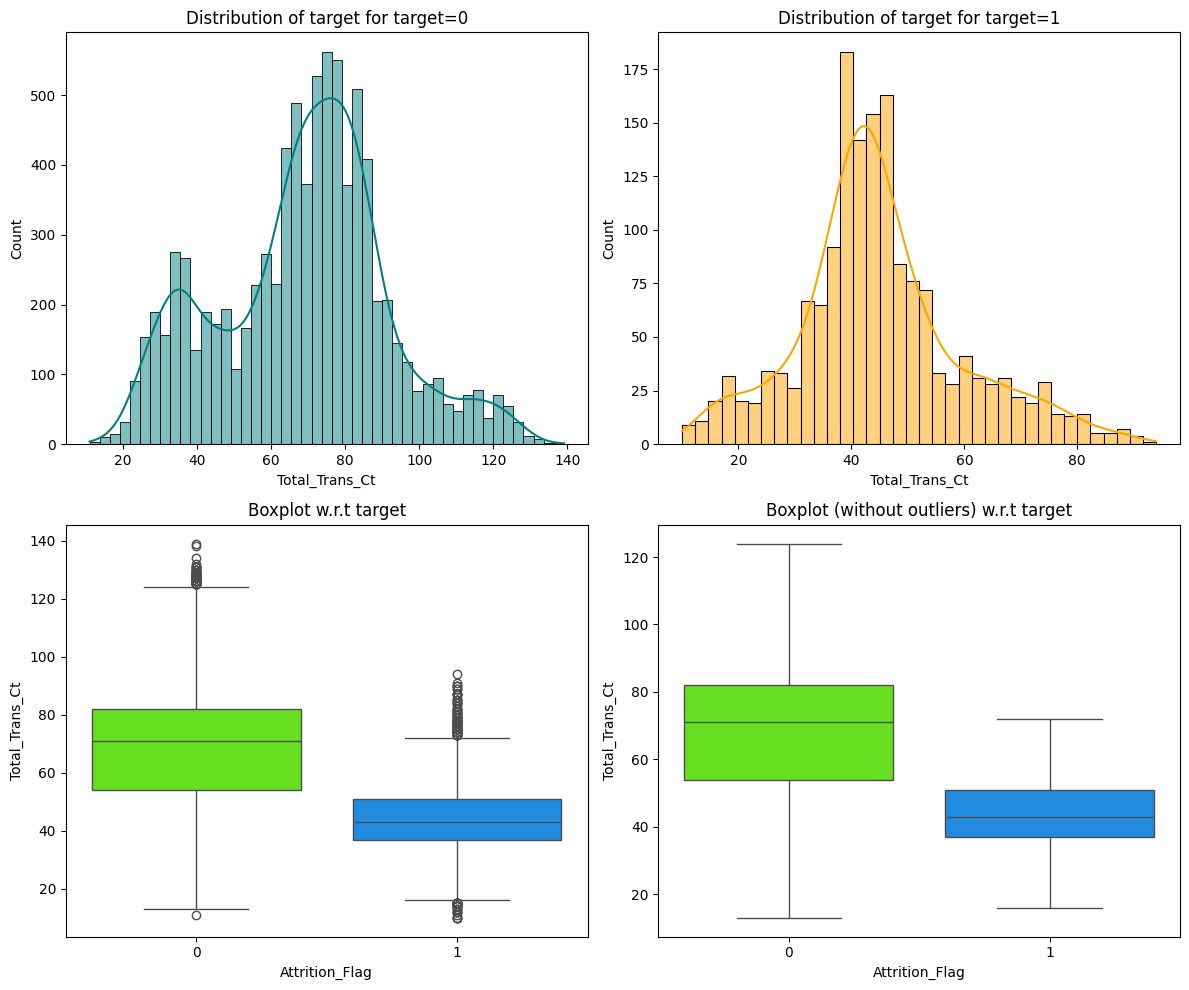

In [108]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

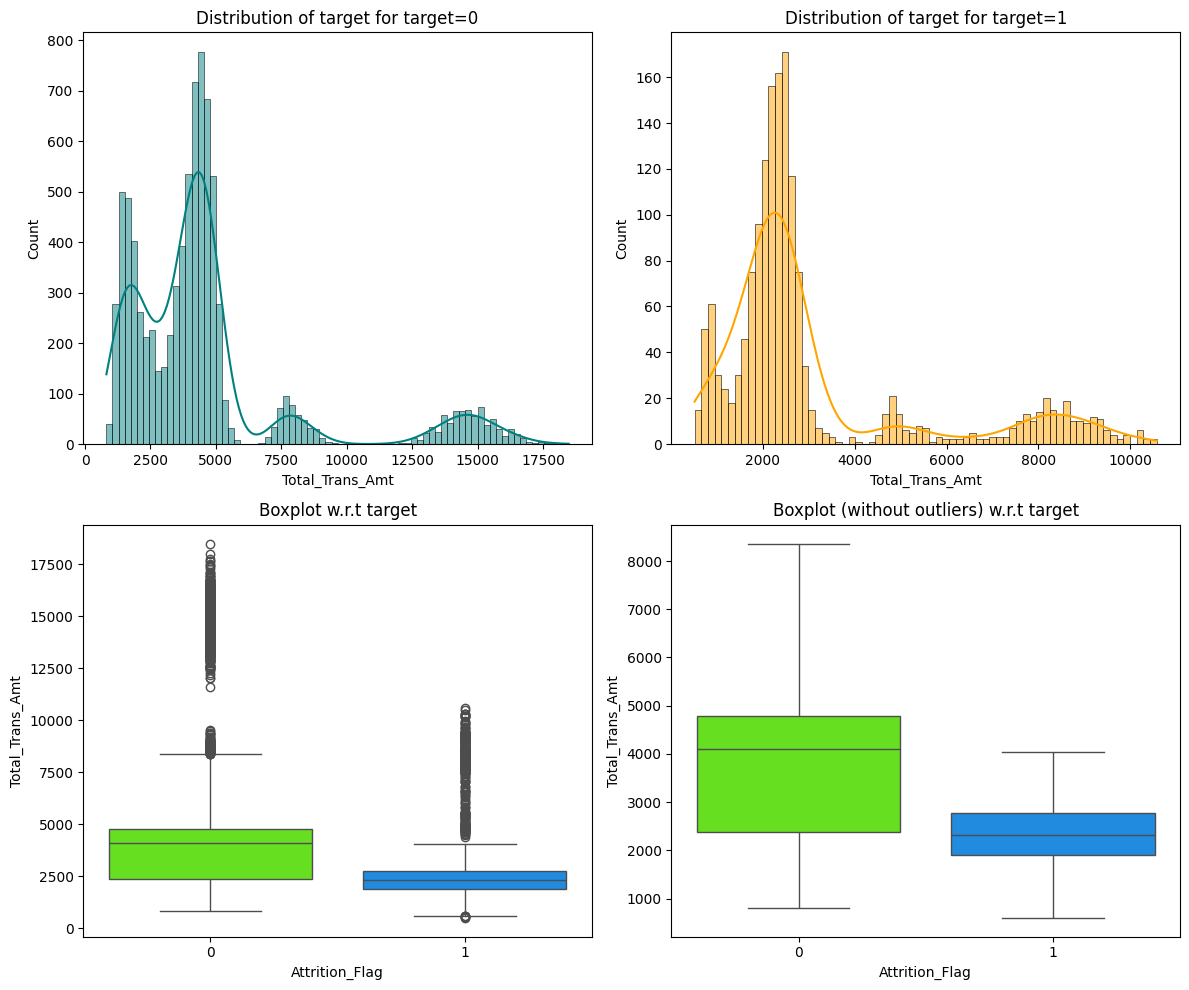

In [109]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

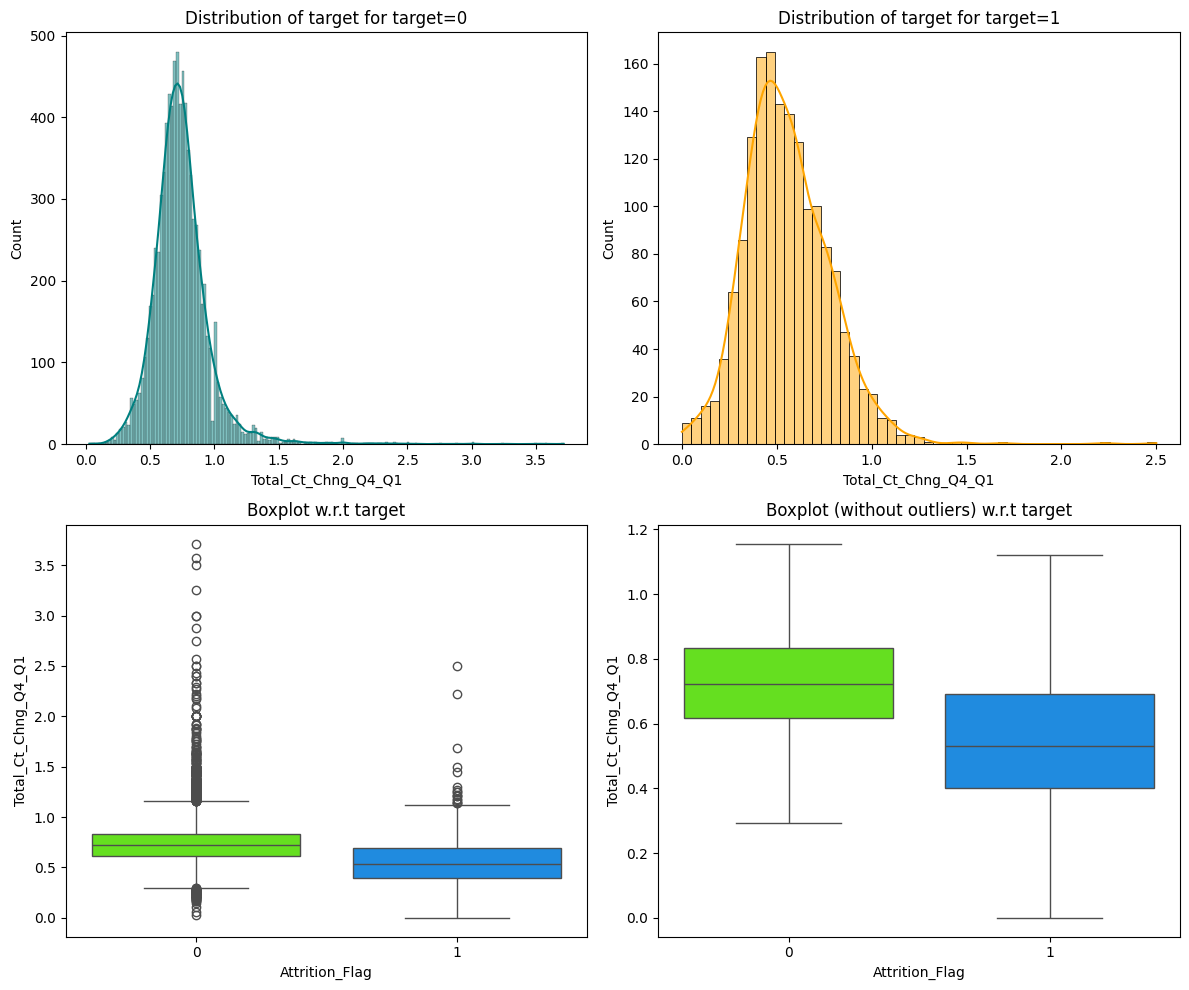

In [110]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

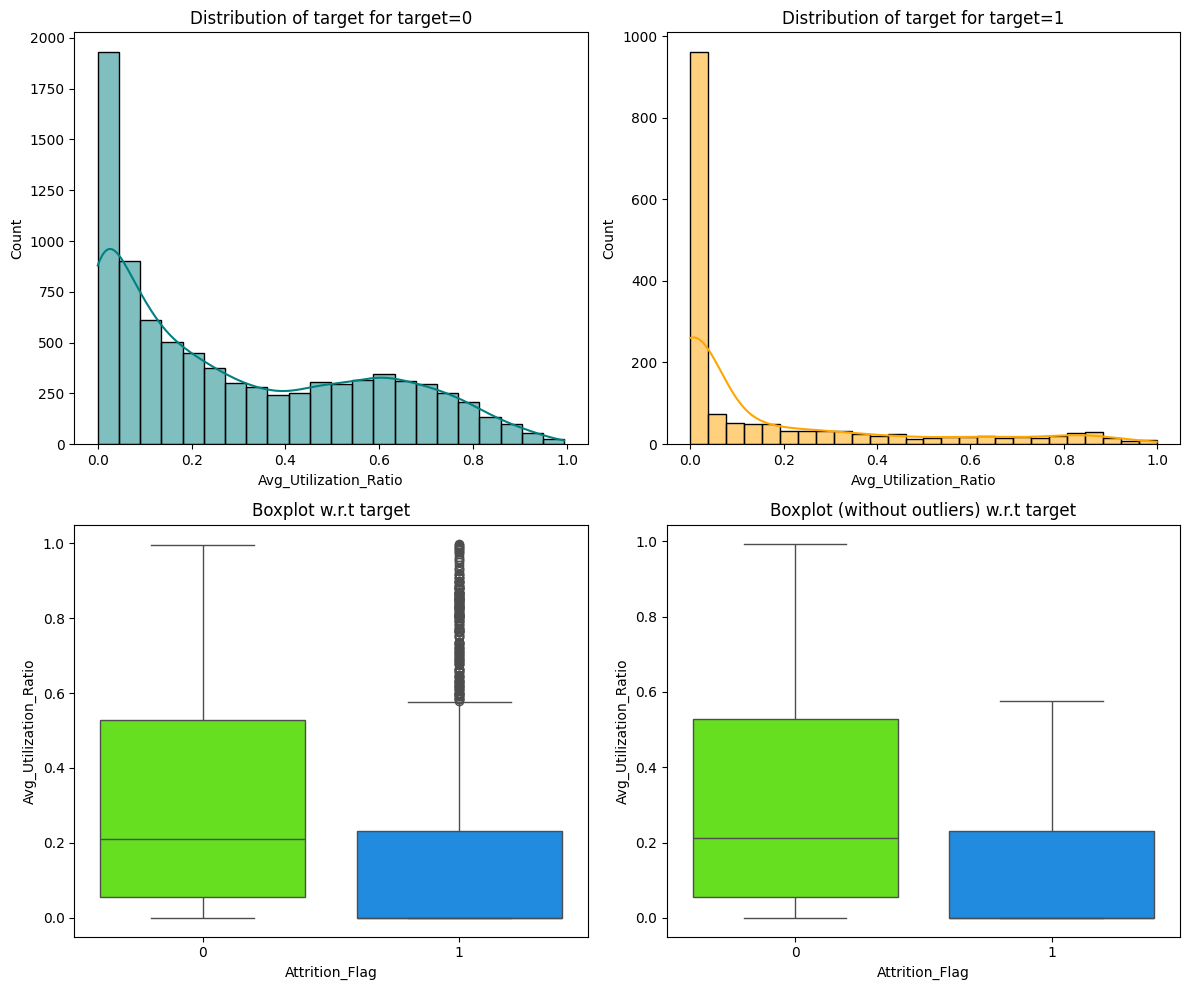

In [111]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

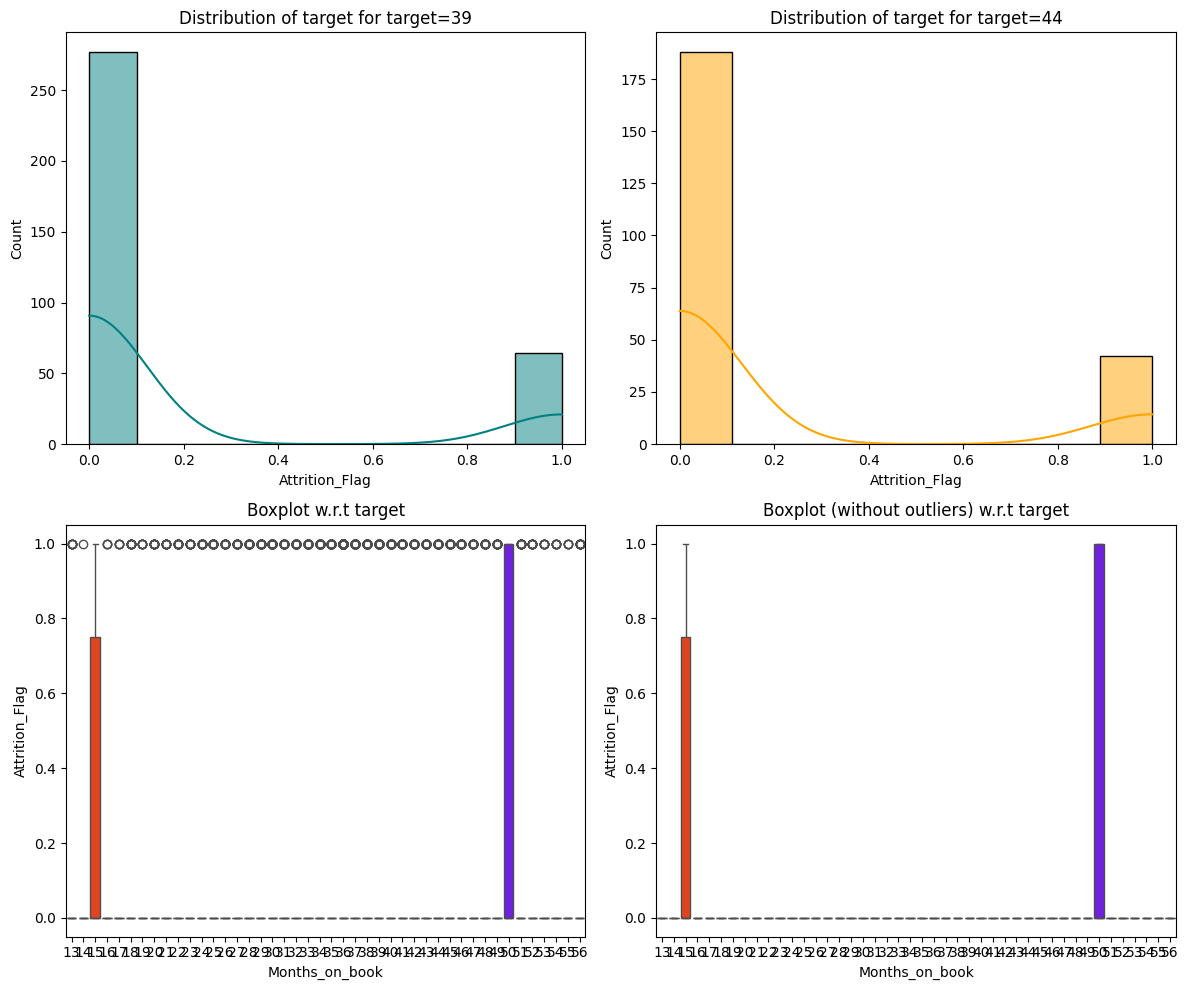

In [112]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

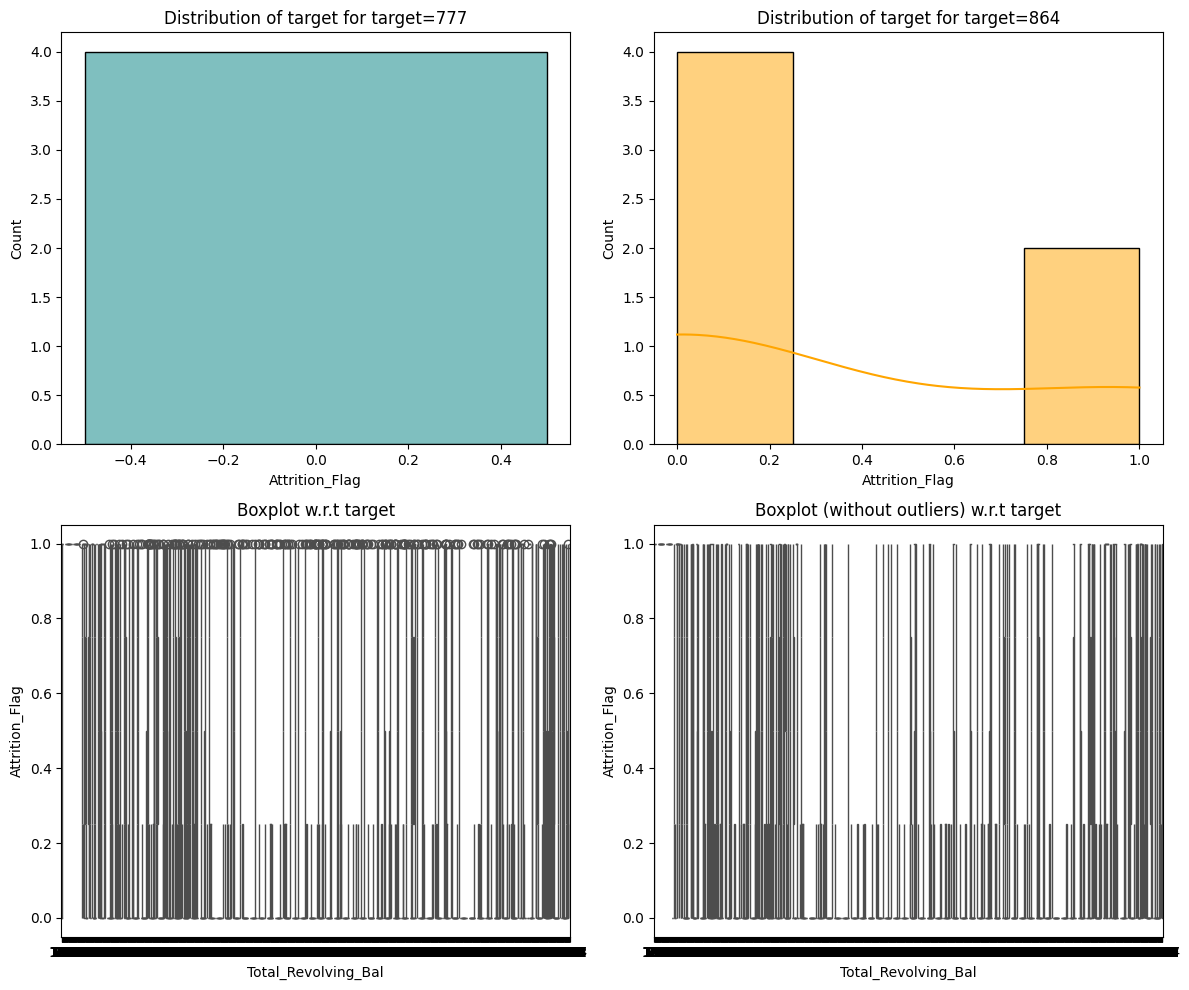

In [113]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Revolving_Bal") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [122]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [123]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Gender,0.000
Dependent_count,0.000
Education_Level,0.000
Marital_Status,0.000
Income_Category,0.000
Card_Category,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000


### Train-Test Split

In [163]:
# creating the copy of the dataframe
data1 = data.copy()

In [125]:
data1["Income_Category"].replace("_____", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [165]:
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,10127
Dependent_count,0
Education_Level,10127
Marital_Status,10127
Income_Category,10127
Card_Category,10127
Months_on_book,0
Total_Relationship_Count,0


In [166]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [167]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [168]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) ## Complete the code to split the data into train test in the ratio 80:20
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


### Missing value imputation

In [169]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [170]:
print("Unique values in Education_Level:", X_train['Education_Level'].unique())
print("Unique values in Marital_Status:", X_train['Marital_Status'].unique())
print("Unique values in Income_Category:", X_train['Income_Category'].unique())
# Fill all-missing columns with a placeholder value
X_train[reqd_col_for_impute] = X_train[reqd_col_for_impute].fillna('Unknown')
X_val[reqd_col_for_impute] = X_val[reqd_col_for_impute].fillna('Unknown')
X_test[reqd_col_for_impute] = X_test[reqd_col_for_impute].fillna('Unknown')

# Re-run the imputation if necessary (likely won't be needed after filling)
X_train[reqd_col_for_impute] = pd.DataFrame(
    imputer.fit_transform(X_train[reqd_col_for_impute]),
    columns=reqd_col_for_impute,
    index=X_train.index
)

X_val[reqd_col_for_impute] = pd.DataFrame(
    imputer.transform(X_val[reqd_col_for_impute]),
    columns=reqd_col_for_impute,
    index=X_val.index
)

X_test[reqd_col_for_impute] = pd.DataFrame(
    imputer.transform(X_test[reqd_col_for_impute]),
    columns=reqd_col_for_impute,
    index=X_test.index
)


Unique values in Education_Level: [nan]
Unique values in Marital_Status: [nan]
Unique values in Income_Category: [nan]


In [171]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                   0
Gender                      8101
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category               8101
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64
------------------------------
Customer_Age                  0
Gender                      507
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               507
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_

In [172]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Education_Level
Unknown    8101
Name: count, dtype: int64
******************************
Marital_Status
Unknown    8101
Name: count, dtype: int64
******************************
Income_Category
Unknown    8101
Name: count, dtype: int64
******************************


In [173]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Education_Level
Unknown    507
Name: count, dtype: int64
******************************
Marital_Status
Unknown    507
Name: count, dtype: int64
******************************
Income_Category
Unknown    507
Name: count, dtype: int64
******************************


In [174]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Education_Level
Unknown    8101
Name: count, dtype: int64
******************************
Marital_Status
Unknown    8101
Name: count, dtype: int64
******************************
Income_Category
Unknown    8101
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [175]:
import pandas as pd
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True) ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 16) (507, 16) (1519, 16)


* After encoding there are 29 columns.

In [176]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3105,53,NaN,2,NaN,37,5,3,4,7282.000,0,7282.000,0.740,3364,69,0.816,0.000
3721,44,NaN,4,NaN,37,4,3,3,5826.000,0,5826.000,0.689,3756,73,0.921,0.000
3389,50,NaN,3,NaN,41,4,2,2,2563.000,1860,703.000,0.680,3774,83,0.804,0.726
3552,50,NaN,1,NaN,30,6,2,3,9771.000,1776,7995.000,0.460,2778,53,0.472,0.182
398,55,NaN,0,NaN,49,5,3,3,3805.000,2233,1572.000,1.095,1743,27,0.929,0.587


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [177]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [178]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [183]:
!pip install sklearn
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'

# Fit the imputer on your training data and transform both training and validation data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    # Fit the model on imputed data
    model.fit(X_train_imputed, y_train)
    scores = recall_score(y_train, model.predict(X_train_imputed))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    # Predict on imputed validation data
    scores_val = recall_score(y_val, model.predict(X_val_imputed))
    print("{}: {}".format(name, scores_val))

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

Training Performance:

Bagging: 0.978494623655914
Random forest: 1.0
Gradient Boosting: 0.8817204301075269
AdaBoost: 0.8533026113671275
Logistic Regression: 0.489247311827957

Validation Performance:

Bagging: 0.7777777777777778
Random forest: 0.8395061728395061
Gradient Boosting: 0.9012345679012346
AdaBoost: 0.8641975308641975
Logistic Regression: 0.38271604938271603


### Model Building - Oversampled Data

In [185]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or choose another strategy

# Fit the imputer on training data and transform both training and validation data
X_train_imputed = imputer.fit_transform(X_train)

# Now apply SMOTE on the imputed data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_imputed, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 14)
After Oversampling, the shape of train_y: (13598,) 



In [188]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

# Impute the validation data using the SAME imputer fitted on the training data
X_val_imputed = imputer.transform(X_val) # Use the imputer fit on the training data

for name, model in models:
    model.fit(X_train_over, y_train_over)
    # Predict on the imputed validation data
    scores = recall_score(y_val, model.predict(X_val_imputed)) # Predict on imputed validation data
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9986762759229298
Random forest: 1.0
Gradient Boosting: 0.9807324606559789
AdaBoost: 0.9655831739961759
Logistic Regression: 0.837623179879394

Validation Performance:

Bagging: 0.8888888888888888
Random forest: 0.8765432098765432
Gradient Boosting: 0.9135802469135802
AdaBoost: 0.8888888888888888
Logistic Regression: 0.7777777777777778


### Model Building - Undersampled Data

In [190]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [191]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 16)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
# prompt: models = []  # Empty list to store all the models
# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))
# models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
# models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
# models.append(("Logistic Regression"

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


In [193]:
!pip install sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer

# Assuming X_train_un, y_train_un, X_val, y_val are already defined

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
X_train_un_imputed = imputer.fit_transform(X_train_un)
X_val_imputed = imputer.transform(X_val)  # Use the same imputer fitted on training data

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un_imputed, y_train_un)  # Use imputed data for training
    scores = recall_score(y_train_un, model.predict(X_train_un_imputed))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val_imputed))  # Use imputed data for validation
    print("{}: {}".format(name, scores))

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

Training Performance:

Bagging: 0.9930875576036866
Random forest: 1.0
Gradient Boosting: 0.9807987711213517
AdaBoost: 0.9500768049155146
Logistic Regression: 0.8241167434715821

Validation Performance:

Bagging: 0.9259259259259259
Random forest: 0.9506172839506173
Gradient Boosting: 0.9382716049382716
AdaBoost: 0.9506172839506173
Logistic Regression: 0.8271604938271605


### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [197]:
%%time
import numpy as np
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Use the imputed data for hyperparameter tuning
randomized_cv.fit(X_train_un_imputed, y_train_un)  # Change X_train to X_train_un_imputed

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.958517536103743:
CPU times: user 2.27 s, sys: 131 ms, total: 2.4 s
Wall time: 1min


In [198]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state= 1, # Fill in with the random state used during tuning
    n_estimators= randomized_cv.best_params_['n_estimators'], # Extract best n_estimators
    learning_rate= randomized_cv.best_params_['learning_rate'], # Extract best learning rate
    base_estimator= randomized_cv.best_params_['base_estimator'] # Extract best base estimator
)

# Fit the model on original (imputed) data
tuned_adb.fit(X_train_un_imputed, y_train_un) # Use the method to fit the model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [200]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un_imputed, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.986,0.991,0.981,0.986


In [202]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, X_val_imputed, y_val) ## Complete the code to check the performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.953,0.963,0.788,0.867


#### Tuning Ada Boost using undersampled data

In [216]:
# prompt: # Creating new pipeline with best parameters
# tuned_ada2 = AdaBoostClassifier( random_state=___,
#     n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
# ) ## Complete the code with the best parameters obtained from tuning
# tuned_ada2.'_______' ## Complete the code to fit the model on undersampled data

# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state= 1,
    n_estimators= randomized_cv.best_params_['n_estimators'], learning_rate= randomized_cv.best_params_['learning_rate'], base_estimator= DecisionTreeClassifier(max_depth=randomized_cv.best_params_['base_estimator'].max_depth, random_state=1)
) ## Complete the code with the best parameters obtained from tuning
tuned_ada2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data


ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [220]:
# Creating new pipeline with best parameters
tuntuned_ada2 = AdaBoostClassifier( random_state= 1,
    n_estimators= randomized_cv.best_params_['n_estimators'], learning_rate= randomized_cv.best_params_['learning_rate'], base_estimator= DecisionTreeClassifier(max_depth=randomized_cv.best_params_['base_estimator'].max_depth, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

# Impute missing values in X_train_un before fitting the model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train_un_imputed = imputer.fit_transform(X_train_un)

# Fit the model on the imputed data
tuned_ada2.fit(X_train_un_imputed, y_train_un) # Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [222]:
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train_un_imputed, y_train_un) ## Complete the code to check the performance on training set
adb2_train

,Accuracy,Recall,Precision,F1
0,0.986,0.991,0.981,0.986


In [ ]:
# prompt: # Checking model's performance on validation set
# adb2_val =  '_______' ## Complete the code to check the performance on validation set
# adb2_val

# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_ada2, X_val_imputed, y_val) ## Complete the code to check the performance on validation set
adb2_val


In [223]:
# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_ada2, X_val_imputed, y_val) ## Complete the code to check the performance on validation set
adb2_val

,Accuracy,Recall,Precision,F1
0,0.953,0.963,0.788,0.867


#### Tuning Gradient Boosting using undersampled data

In [ ]:
# prompt: %%time
# #Creating pipeline
# Model = GradientBoostingClassifier(random_state=1)
# #Parameter grid to pass in RandomSearchCV
# param_grid = {
#     "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
#     "n_estimators": np.arange(50,110,25),
#     "learning_rate": [0.01,0.1,0.05],
#     "subsample":[0.7,0.9],
#     "max_features":[0.5,0.7,1],
# }
# # Type of scoring used to compare

import numpy as np
%%time
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)
#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


In [227]:
%%time

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier from the correct module
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.impute import SimpleImputer

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Impute missing values in X_train_un
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of each column
X_train_imputed = imputer.fit_transform(X_train_un) # Fit and transform the training data

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV using imputed data
randomized_cv.fit(X_train_imputed, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9500736811081639:
CPU times: user 2.16 s, sys: 189 ms, total: 2.35 s
Wall time: 1min 23s


In [232]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
   max_features=0.7,  # Replace with your best value
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,   # Replace with your best value
    n_estimators=75,    # Replace with your best value
    subsample=0.9,
)

# Handle missing values before fitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Choose a strategy to fill missing values
X_train_imputed = imputer.fit_transform(X_train_un)

# Fit the model using the imputed data
tuned_gbm1.fit(X_train_imputed, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [233]:
from sklearn.metrics import classification_report
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_imputed, y_train_un)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.971,0.975,0.968,0.971


In [235]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val_imputed, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.943,0.926,0.765,0.838


#### Tuning Gradient Boosting using original data

In [236]:
%%time

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
# Assuming X_train_imputed and y_train_un are available from previous steps
randomized_cv.fit(X_train_imputed, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9500736811081639:
CPU times: user 2.23 s, sys: 308 ms, total: 2.54 s
Wall time: 1min 27s


In [240]:
tuned_gbm2 = GradientBoostingClassifier(
    max_features= 0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate= 0.1,
    n_estimators= 75,
    subsample= 0.9
)

#### Tuning Gradient Boosting using over sampled data

In [245]:
X_train_imputed_for_prediction = imputer.transform(X_train)  # Assuming 'imputer' is the imputer object used during training

# Fit the model to your training data
tuned_gbm2.fit(X_train_imputed_for_prediction, y_train)

gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_imputed_for_prediction, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.967,0.837,0.949,0.889


In [246]:
# Impute missing values in X_val before prediction
X_val_imputed = imputer.transform(X_val)  # Assuming 'imputer' is the same imputer object used for training

gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val_imputed, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.964,0.815,0.957,0.880


#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [247]:
%%time

!pip install xgboost
from xgboost import XGBClassifier
import numpy as np
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_imputed, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9992307692307693:
CPU times: user 1.46 s, sys: 205 ms, total: 1.66 s
Wall time: 44.1 s


In [248]:
# Assuming 'randomized_cv' is the fitted RandomizedSearchCV object from the previous step
best_params = randomized_cv.best_params_

tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params['subsample'],
    scale_pos_weight=best_params['scale_pos_weight'],
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    gamma=1,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [249]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.945,0.955,0.763,0.848


In [250]:
# Assuming you have the function model_performance_classification_sklearn defined
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.939,0.926,0.750,0.829


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [251]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data
Accuracy,0.971,0.967,0.986
Recall,0.975,0.837,0.991
Precision,0.968,0.949,0.981
F1,0.971,0.889,0.986


In [ ]:
# prompt: # validation performance comparison
# '_______' ## Write the code to compare the performance on validation set

import pandas as pd
# validation performance comparison
models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb2_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting validated with Undersampled data",
    "Gradient boosting validated with Original data",
    "AdaBoost validated with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df


In [252]:
# validation performance comparison
import pandas as pd
# validation performance comparison
models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb2_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting validated with Undersampled data",
    "Gradient boosting validated with Original data",
    "AdaBoost validated with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting validated with Undersampled data,Gradient boosting validated with Original data,AdaBoost validated with Undersampled data
Accuracy,0.943,0.964,0.953
Recall,0.926,0.815,0.963
Precision,0.765,0.957,0.788
F1,0.838,0.880,0.867


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [256]:
X_test_imputed = imputer.transform(X_test)

# Evaluate the model on the test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test_imputed, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.964,0.840,0.932,0.884


### Feature Importances

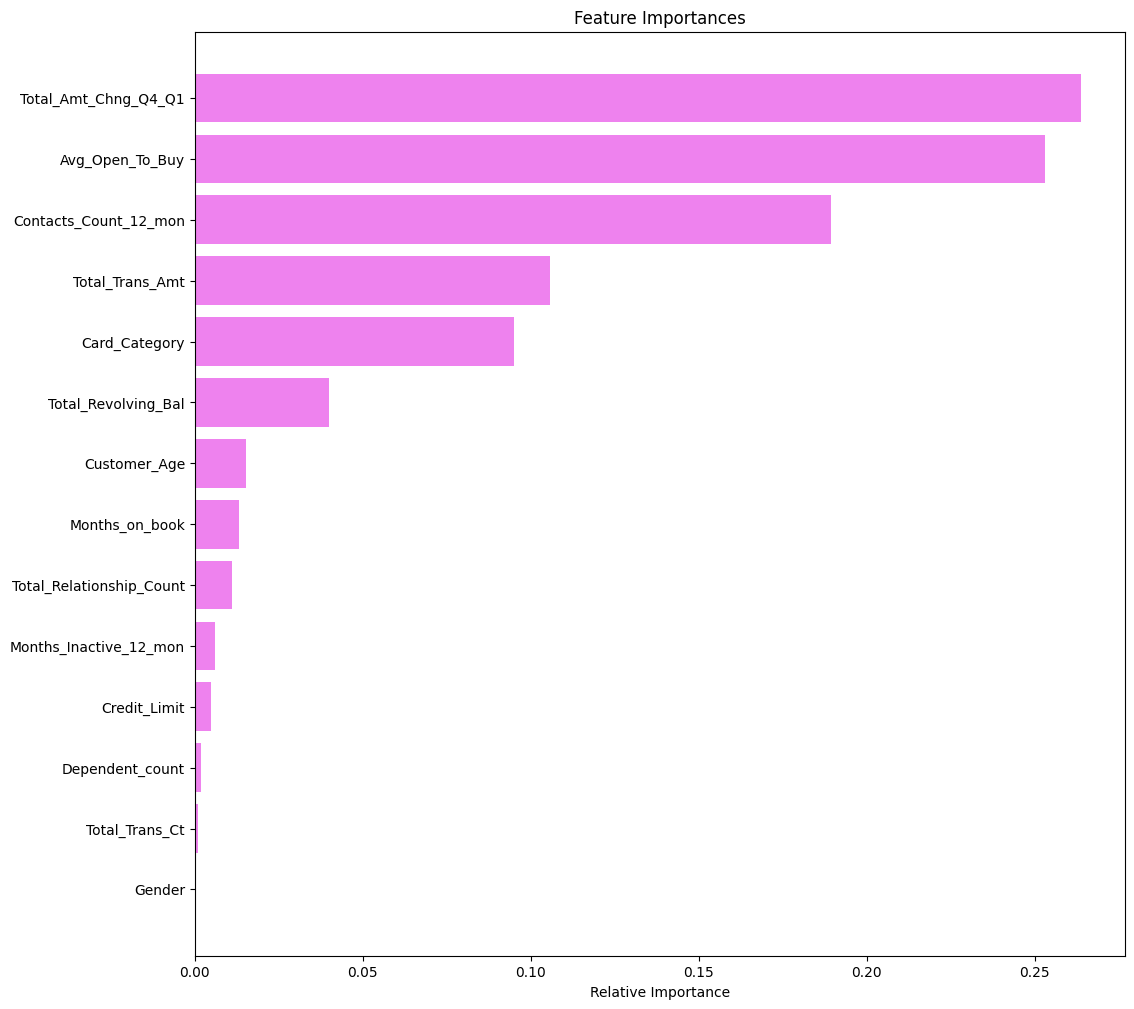

In [257]:
import matplotlib.pyplot as plt
import numpy as np
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


-


***